**Project Description**

The Global Power Plant Database is a comprehensive, open-source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:

•	`country` (text): 3-character country code corresponding to the ISO 3166-1 alpha-3 specification [5]\
•	`country_long` (text): longer form of the country designation\
•	`name` (text): name or title of the power plant, generally in Romanized form\
•	`gppd_idnr` (text): 10- or 12-character identifier for the power plant\
•	`capacity_mw` (number): electrical generating capacity in megawatts\
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)\
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)\
•	`primary_fuel` (text): energy source used in primary electricity generation or export\
•	`other_fuel1` (text): energy source used in electricity generation or export\
•	`other_fuel2` (text): energy source used in electricity generation or export\
•	`other_fuel3` (text): energy source used in electricity generation or export\
•	 `commissioning year` (number): year of plant operation, weighted by unit-capacity when data is available\
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form\
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form\
•	`url` (text): web document corresponding to the `source` field\
•	`geolocation source` (text): attribution for geolocation information\
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.\
•	`year_of_capacity_data` (number): year the capacity information was reported\
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013\
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014\
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015\
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016\
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017\
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018\
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019\
•	`generation_data_source` (text): attribution for the reported generation information\
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013\
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 \
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015\
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016\
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017\
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas’ methods to combine all the datasets and then start working on this project.


Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database


**1. Importing required libraries**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

**2. Reading all the data from csv files and loading into jupyter notebook for further evaluation**

In [101]:
data = pd.read_csv('database_IND.csv')
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
data1 = pd.read_csv('database_AUS.csv')
data1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [103]:
data2 = pd.read_csv('database_USA.csv')
data2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


**3. We have 3 csv files containing data for India, Australia and USA power plant database. So we will need to append all the data to single dataframe as we have same columns in all these files.**

In [104]:
# Appending data from 3 csv file to single dataframe.

In [105]:
df = pd.DataFrame()

In [106]:
df = df.append(data, ignore_index=True)

df = df.append(data1, ignore_index=True)

df = df.append(data2, ignore_index=True)

In [107]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.67100,2.460150,2.489,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.00000,0.000000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


We are given 2 output/dependent variable for prediction. First is capacity_mw and second is Primary_fuel. 
>> After looking at values we can see, continuous data in our output variable capacity_mw and categorical data in the second output variable Primary_fuel.
>> We will need to use Regression and classification model respecively for our machine learning model building and prediction.

**4. Exploratory Data Analysis (EDA)**

In [108]:
df.shape

(13298, 27)

We have 13298 rows and 27 columns in our dataset.

In [109]:
# Checking all columns information

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

We can see out 26 columns, we have 13 as float dataypes and 13 are of object datatype.

In [111]:
# Checking for null values

In [112]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

<Axes: >

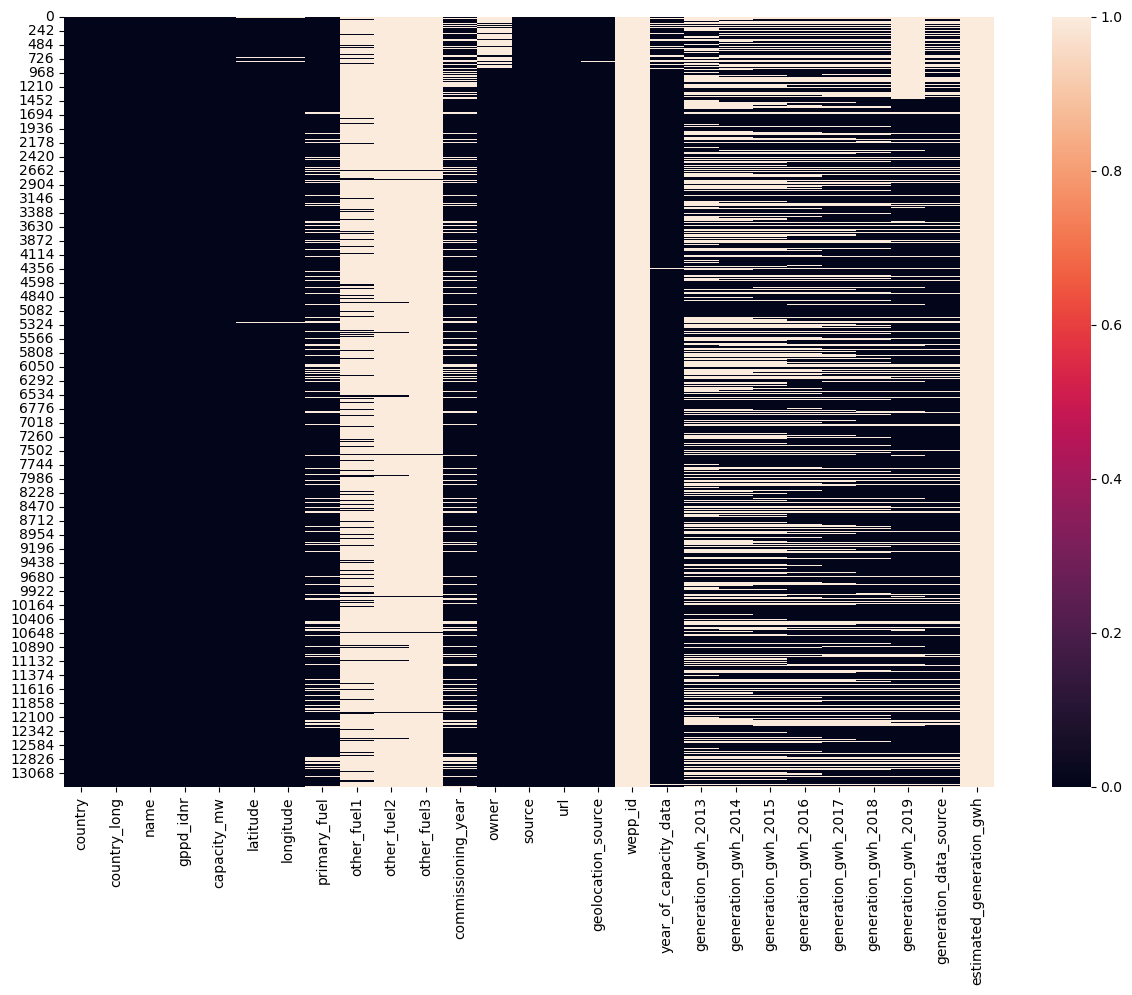

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

From above we can see almost half the data is missing from the dataset. With this high volume of missing data, its very hard to use these data for prediction and ultimately making our model biased. Its important to drop these colummns containing high number of missing values as our model will not give avcuracy and predcit the correct results.

In [114]:
# Dropping the columns

In [115]:
df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'wepp_id', 'generation_gwh_2013',
        'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'generation_gwh_2019',
        'generation_data_source', 'estimated_generation_gwh'], axis=1, inplace=True)

In [116]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data'],
      dtype='object')

In [117]:
df.shape

(13298, 13)

So we can number of columns have been reduced to 13 from 27.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                13298 non-null  object 
 1   country_long           13298 non-null  object 
 2   name                   13298 non-null  object 
 3   gppd_idnr              13298 non-null  object 
 4   capacity_mw            13292 non-null  float64
 5   latitude               13220 non-null  float64
 6   longitude              13220 non-null  float64
 7   primary_fuel           11294 non-null  object 
 8   commissioning_year     10654 non-null  float64
 9   source                 13298 non-null  object 
 10  url                    13298 non-null  object 
 11  geolocation_source     13275 non-null  object 
 12  year_of_capacity_data  12860 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.3+ MB


In [119]:
# Checking for unique values

In [120]:
df.nunique()

country                      3
country_long                 3
name                     13266
gppd_idnr                13298
capacity_mw               2304
latitude                 12385
longitude                12733
primary_fuel                14
commissioning_year        1936
source                     206
url                        325
geolocation_source           5
year_of_capacity_data        1
dtype: int64

From above we can see, country and contry_long columnn has only 3 unique rows out of 13298 rows. Also, name and gppd_idnr columns have almost all the rows of unique values. Year_of_ capacity_data has only 1 unique row and url column has website links and description data which I dont think we will need for our model. 

Therefore, for optimum results its necessary to drop these columns and make our dataset much cleaner and refined for our model building.

In [121]:
# Dropping the columns

In [122]:
df.drop(['country', 'country_long', 'name','gppd_idnr','url', 'year_of_capacity_data'], axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.00000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.00000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.00000,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
13293,3.4,42.8869,-76.9683,Wind,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13294,1.0,44.3195,-92.6703,Solar,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13295,0.0,44.0460,-92.7600,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration
13296,0.0,39.7373,-105.0170,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration


We have reduced columns from 13 to 7 and we can see our dataset more neat and clean.

In [123]:
df.shape

(13298, 7)

In [124]:
# checking for null values 

In [125]:
df.isnull().sum()

capacity_mw              6
latitude                78
longitude               78
primary_fuel          2004
commissioning_year    2644
source                   0
geolocation_source      23
dtype: int64

In [126]:
# Checking for missing values

In [127]:
df.isna().sum()

capacity_mw              6
latitude                78
longitude               78
primary_fuel          2004
commissioning_year    2644
source                   0
geolocation_source      23
dtype: int64

So from above we can still see some null or missing values in our dataset and we will need to treat them acoordinglr for our model to perform better.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         13292 non-null  float64
 1   latitude            13220 non-null  float64
 2   longitude           13220 non-null  float64
 3   primary_fuel        11294 non-null  object 
 4   commissioning_year  10654 non-null  float64
 5   source              13298 non-null  object 
 6   geolocation_source  13275 non-null  object 
dtypes: float64(4), object(3)
memory usage: 727.4+ KB


In [129]:
# Seprating output variables from our dataset.

In [130]:
df1 = df.drop(['capacity_mw', 'primary_fuel'],axis=1)

In [131]:
df1

,latitude,longitude,commissioning_year,source,geolocation_source
0,28.1839,73.2407,2011.00000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,24.7663,74.6090,NaN,Ultratech Cement ltd,WRI
2,21.9038,69.3732,NaN,CDM,WRI
3,23.8712,91.3602,2004.00000,Central Electricity Authority,WRI
4,21.9603,82.4091,2015.00000,Central Electricity Authority,WRI
...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13294,44.3195,-92.6703,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13295,44.0460,-92.7600,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration
13296,39.7373,-105.0170,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration


In [132]:
df1.isna().sum()

latitude                78
longitude               78
commissioning_year    2644
source                   0
geolocation_source      23
dtype: int64

In [133]:
df1.describe()

,latitude,longitude,commissioning_year
count,13220.000000,13220.000000,10654.000000
mean,35.053213,-73.794217,1998.184904
std,15.444195,62.868834,24.017781
min,-42.888300,-171.712400,1896.000000
25%,33.901700,-104.659875,1988.000000
50%,38.389750,-87.346000,2008.000000
75%,42.175125,-75.475925,2015.000000
max,425.246100,153.434100,2020.000000


In [134]:
# Filling missing/null values for numerical variables

In [135]:
df1['latitude'].fillna(df['latitude'].mean(), inplace=True)
df1['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [136]:
df['capacity_mw'].fillna(df['capacity_mw'].mean(),inplace=True)

In [137]:
df['primary_fuel']=df['primary_fuel'].fillna(df['primary_fuel'].mode()[0])

In [138]:
df1 = pd.DataFrame(df1)
df1

,latitude,longitude,commissioning_year,source,geolocation_source
0,28.1839,73.2407,2011.00000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,24.7663,74.6090,NaN,Ultratech Cement ltd,WRI
2,21.9038,69.3732,NaN,CDM,WRI
3,23.8712,91.3602,2004.00000,Central Electricity Authority,WRI
4,21.9603,82.4091,2015.00000,Central Electricity Authority,WRI
...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13294,44.3195,-92.6703,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration
13295,44.0460,-92.7600,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration
13296,39.7373,-105.0170,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration


In [139]:
df1['commissioning_year'] = df1['commissioning_year'].fillna(df1['commissioning_year'].mode()[0])

In [140]:
df1['geolocation_source'] = df1['geolocation_source'].fillna(df1['geolocation_source'].mode()[0])

In [141]:
df1.isnull().sum()

latitude              0
longitude             0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

Now we can see, we have successfully removed missing values from our dataset.

**5. Visualisation**

In [142]:
# Checking output variables

In [143]:
df['capacity_mw'].describe()

count    13298.000000
mean       117.738717
std        347.090703
min          0.000000
25%          1.500000
50%          5.500000
75%         52.975000
max       6809.000000
Name: capacity_mw, dtype: float64

<Axes: xlabel='capacity_mw', ylabel='Density'>

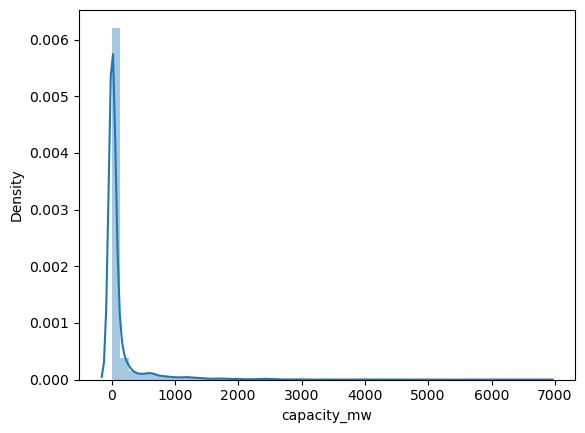

In [144]:
sns.distplot(df['capacity_mw'])

<Axes: xlabel='primary_fuel', ylabel='count'>

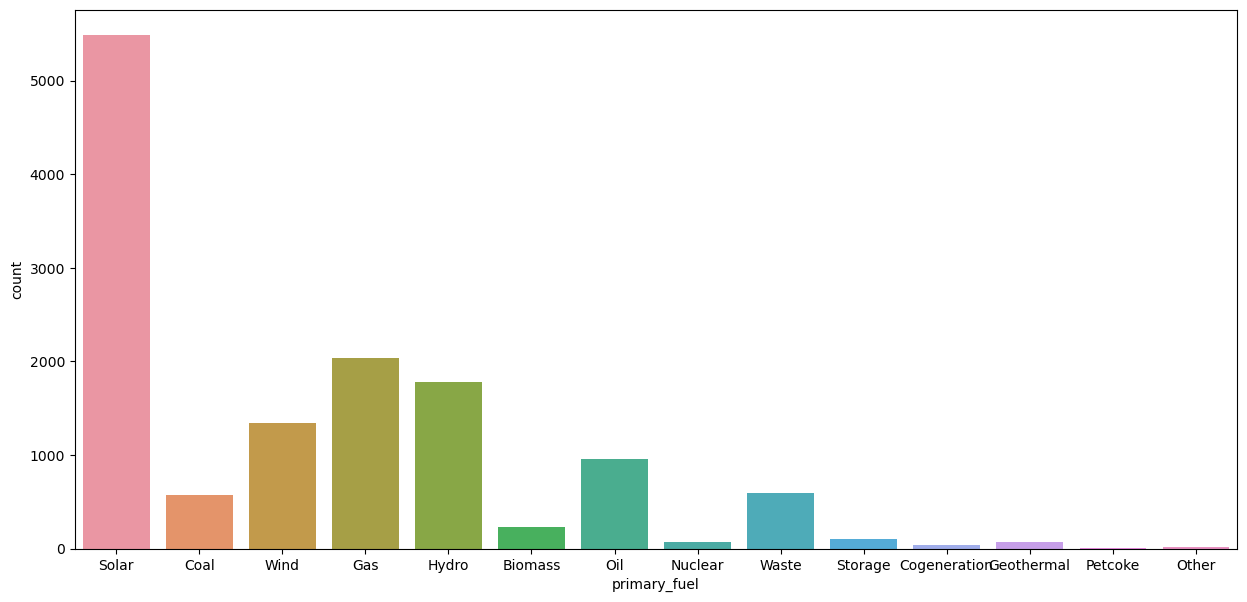

In [145]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'primary_fuel', data = df)

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

Above countplot suggest the source used in primary electricity generation or export.
>> We can see Solar has been the priamry source of electricity generation worldwide while nuclear, storage, geothermal, petcode and others are least used in electricity generation.

>> However, we can see class imbalnce in our output variable and we will need to fix class imbalnce for our model.

<Axes: xlabel='geolocation_source', ylabel='count'>

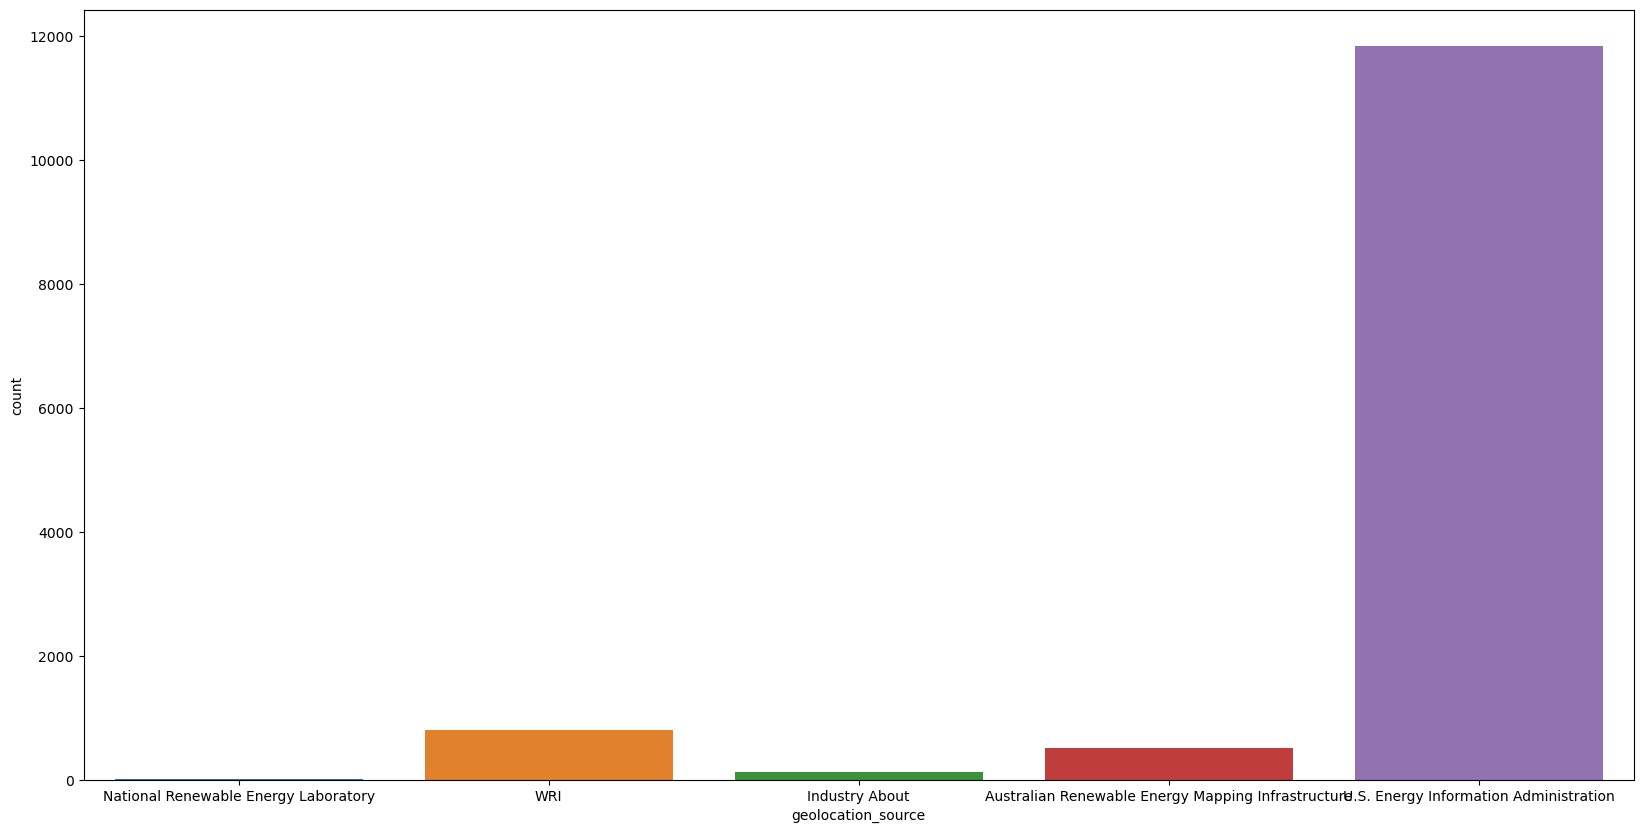

In [146]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'geolocation_source', data=df)

From above countplot, we can see U.S. Energy Information Administration has highest values for geolocation information.

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

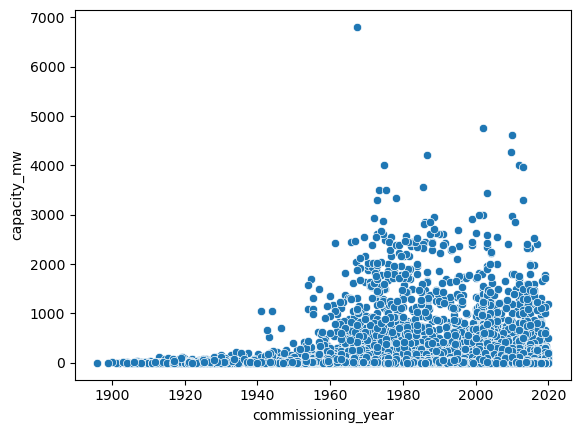

In [147]:
sns.scatterplot(x = df['commissioning_year'],y = df['capacity_mw'])

<Axes: xlabel='longitude', ylabel='capacity_mw'>

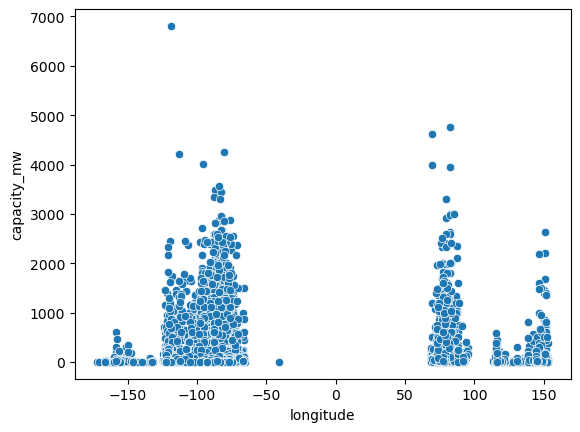

In [148]:
sns.scatterplot(x = df['longitude'],y = df['capacity_mw'])

<Axes: xlabel='latitude', ylabel='capacity_mw'>

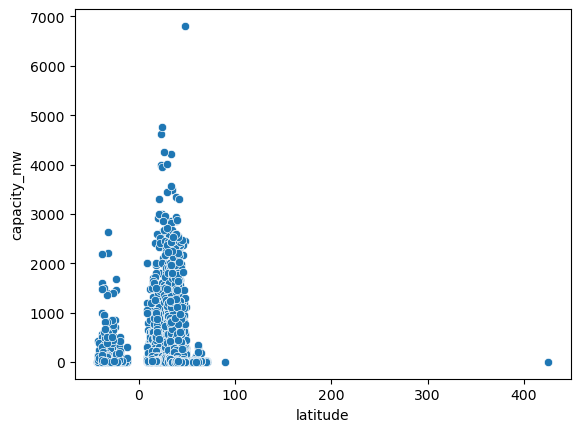

In [149]:
sns.scatterplot(x = df['latitude'],y = df['capacity_mw'])

<Figure size 1500x1000 with 0 Axes>

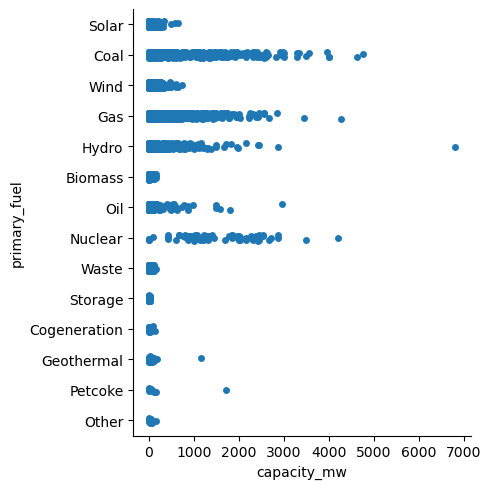

In [150]:
plt.figure(figsize = (15,10))
sns.catplot(x = 'capacity_mw',y = 'primary_fuel', data = df)

<Figure size 1500x1000 with 0 Axes>

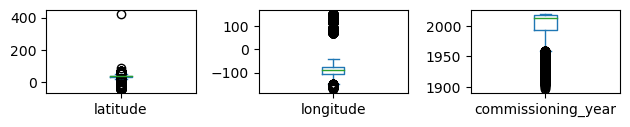

In [151]:
plt.figure(figsize=(15,10))
df1.plot(kind = 'box', subplots = True, layout= (4,3))
plt.tight_layout()

From above we can see some outliers present in the dataset and we will need to remove it for our model.

In [152]:
df.isnull().sum()

capacity_mw              0
latitude                78
longitude               78
primary_fuel             0
commissioning_year    2644
source                   0
geolocation_source      23
dtype: int64

In [153]:
df1['capacity_mw'] = df.capacity_mw

In [154]:
df1['primary_fuel'] = df.primary_fuel

In [155]:
df1.isnull().sum()

latitude              0
longitude             0
commissioning_year    0
source                0
geolocation_source    0
capacity_mw           0
primary_fuel          0
dtype: int64

now we will need to convert object datatype into numerous for the prediction.

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le = LabelEncoder()

In [158]:
df1['primary_fuel'] = le.fit_transform(df1['primary_fuel'])

In [159]:
df1

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw,primary_fuel
0,28.1839,73.2407,2011.00000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2.5,10
1,24.7663,74.6090,2017.00000,Ultratech Cement ltd,WRI,98.0,1
2,21.9038,69.3732,2017.00000,CDM,WRI,39.2,13
3,23.8712,91.3602,2004.00000,Central Electricity Authority,WRI,135.0,3
4,21.9603,82.4091,2015.00000,Central Electricity Authority,WRI,1800.0,1
...,...,...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,3.4,13
13294,44.3195,-92.6703,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,1.0,10
13295,44.0460,-92.7600,2017.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,0.0,10
13296,39.7373,-105.0170,2017.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,0.0,10


Now we will need to convert categorical data into numerical datatype. For that we will need to use ordinal encoder.

In [160]:
from sklearn.preprocessing import OrdinalEncoder

In [161]:
oe = OrdinalEncoder()

In [162]:
df1['geolocation_source'] = oe.fit_transform(df1['geolocation_source'].values.reshape(-1,1))

In [163]:
df1['source'] = oe.fit_transform(df1['source'].values.reshape(-1,1))

In [164]:
df1

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw,primary_fuel
0,28.1839,73.2407,2011.00000,116.0,2.0,2.5,10
1,24.7663,74.6090,2017.00000,188.0,4.0,98.0,1
2,21.9038,69.3732,2017.00000,22.0,4.0,39.2,13
3,23.8712,91.3602,2004.00000,24.0,4.0,135.0,3
4,21.9603,82.4091,2015.00000,24.0,4.0,1800.0,1
...,...,...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,185.0,3.0,3.4,13
13294,44.3195,-92.6703,2018.00000,185.0,3.0,1.0,10
13295,44.0460,-92.7600,2017.00000,185.0,3.0,0.0,10
13296,39.7373,-105.0170,2017.00000,185.0,3.0,0.0,10


In [165]:
# Checking for correlation

In [166]:
df1.corr()

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw,primary_fuel
latitude,1.000000,-0.775317,-0.080582,0.756915,0.683251,-0.080810,0.099134
longitude,-0.775317,1.000000,0.059514,-0.907768,-0.450982,0.127417,-0.166047
commissioning_year,-0.080582,0.059514,1.000000,-0.036663,-0.046703,-0.116918,0.459193
source,0.756915,-0.907768,-0.036663,1.000000,0.351768,-0.146727,0.181774
geolocation_source,0.683251,-0.450982,-0.046703,0.351768,1.000000,0.069865,-0.047139
capacity_mw,-0.080810,0.127417,-0.116918,-0.146727,0.069865,1.000000,-0.362352
primary_fuel,0.099134,-0.166047,0.459193,0.181774,-0.047139,-0.362352,1.000000


<Axes: >

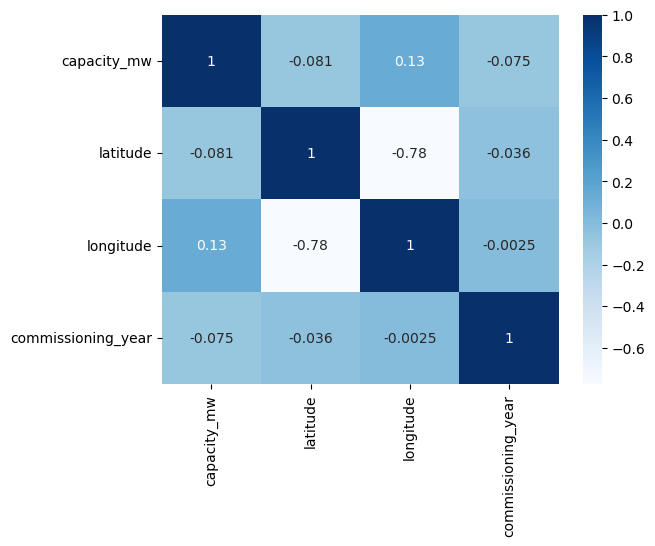

In [167]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [168]:
# Removing outliers

In [169]:
from scipy.stats import zscore

In [170]:
z = np.abs(zscore(df1))
z

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw,primary_fuel
0,0.446110,2.345735,0.398500,1.077367,1.400715,0.332026,0.598148
1,0.668057,2.367564,0.661996,0.397953,1.621384,0.056871,1.858361
2,0.853955,2.284034,0.661996,3.003480,1.621384,0.226286,1.416985
3,0.726187,2.634806,0.091088,2.962499,1.621384,0.049733,1.312470
4,0.850286,2.492004,0.574164,2.962499,1.621384,4.846931,1.858361
...,...,...,...,...,...,...,...
13293,0.508739,0.050638,0.442416,0.336481,0.110335,0.329433,1.416985
13294,0.601775,0.301141,0.705912,0.336481,0.110335,0.336348,0.598148
13295,0.584014,0.302572,0.661996,0.336481,0.110335,0.339229,0.598148
13296,0.304196,0.498116,0.661996,0.336481,0.110335,0.339229,0.598148


In [171]:
threshold = 3
print(np.where(z>3))

(array([    2,     4,    10, ..., 13262, 13265, 13267]), array([3, 5, 5, ..., 2, 5, 2]))


In [172]:
dfn = df1[(z<3).all(axis=1)]
dfn

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw,primary_fuel
0,28.1839,73.2407,2011.00000,116.0,2.0,2.5,10
1,24.7663,74.6090,2017.00000,188.0,4.0,98.0,1
3,23.8712,91.3602,2004.00000,24.0,4.0,135.0,3
5,23.7689,68.6447,2005.00000,24.0,4.0,250.0,1
6,10.4547,77.0078,1970.00000,24.0,4.0,60.0,5
...,...,...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,185.0,3.0,3.4,13
13294,44.3195,-92.6703,2018.00000,185.0,3.0,1.0,10
13295,44.0460,-92.7600,2017.00000,185.0,3.0,0.0,10
13296,39.7373,-105.0170,2017.00000,185.0,3.0,0.0,10


In [173]:
df1.shape

(13298, 7)

In [174]:
dfn.shape

(11868, 7)

We have successfully removed outliers from our dataset.

In [175]:
# Splitting dataset into x and y variables

In [176]:
x = dfn.iloc[:,:-1]
x

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw
0,28.1839,73.2407,2011.00000,116.0,2.0,2.5
1,24.7663,74.6090,2017.00000,188.0,4.0,98.0
3,23.8712,91.3602,2004.00000,24.0,4.0,135.0
5,23.7689,68.6447,2005.00000,24.0,4.0,250.0
6,10.4547,77.0078,1970.00000,24.0,4.0,60.0
...,...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,185.0,3.0,3.4
13294,44.3195,-92.6703,2018.00000,185.0,3.0,1.0
13295,44.0460,-92.7600,2017.00000,185.0,3.0,0.0
13296,39.7373,-105.0170,2017.00000,185.0,3.0,0.0


In [177]:
y = dfn.iloc[:,-1]
y

0        10
1         1
3         3
5         1
6         5
         ..
13293    13
13294    10
13295    10
13296    10
13297     3
Name: primary_fuel, Length: 11868, dtype: int64

In [178]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11868 entries, 0 to 13297
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            11868 non-null  float64
 1   longitude           11868 non-null  float64
 2   commissioning_year  11868 non-null  float64
 3   source              11868 non-null  float64
 4   geolocation_source  11868 non-null  float64
 5   capacity_mw         11868 non-null  float64
 6   primary_fuel        11868 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 741.8 KB


In [179]:
# Fixing class imbalance 

In [180]:
# !pip install scikit-learn==1.2.2

In [181]:
# !pip install imblearn

In [182]:
from imblearn.over_sampling import SMOTE 

In [183]:
st = SMOTE()
X, Y = st.fit_resample(x,y)

In [184]:
Y.value_counts()

10    5405
1     5405
3     5405
5     5405
0     5405
7     5405
6     5405
13    5405
12    5405
11    5405
2     5405
4     5405
9     5405
8     5405
Name: primary_fuel, dtype: int64

We will need to scale our data to ensure our model us biased

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
sc = StandardScaler()

In [187]:
xc = sc.fit_transform(X)
xc

array([[-1.19071866,  3.10245298,  0.78664766, -1.51860902, -3.82435611,
        -0.48287398],
       [-1.65617507,  3.12961973,  1.12228251,  0.3638651 ,  3.25502402,
        -0.08976457],
       [-1.77808227,  3.46220437,  0.39507366, -3.92399261,  3.25502402,
         0.06253961],
       ...,
       [ 0.12387845, -0.34612007,  0.84653498,  0.28542868, -0.28466605,
        -0.08687335],
       [ 0.739483  , -0.24719961,  1.11035409,  0.28542868, -0.28466605,
         0.7487427 ],
       [ 0.61699658, -0.43678264,  0.54026903,  0.28542868, -0.28466605,
        -0.35604649]])

In [188]:
x = pd.DataFrame(data = xc, columns = X.columns)
x

,latitude,longitude,commissioning_year,source,geolocation_source,capacity_mw
0,-1.190719,3.102453,0.786648,-1.518609,-3.824356,-0.482874
1,-1.656175,3.129620,1.122283,0.363865,3.255024,-0.089765
2,-1.778082,3.462204,0.395074,-3.923993,3.255024,0.062540
3,-1.792015,3.011202,0.451013,-3.923993,3.255024,0.535917
4,-3.605328,3.177246,-1.506857,-3.923993,3.255024,-0.246185
...,...,...,...,...,...,...
75665,-0.626562,-0.356553,0.656278,0.285429,-0.284666,0.114079
75666,0.925949,0.234079,1.213600,0.285429,-0.284666,-0.385873
75667,0.123878,-0.346120,0.846535,0.285429,-0.284666,-0.086873
75668,0.739483,-0.247200,1.110354,0.285429,-0.284666,0.748743


**6. Machine Learning Model Building**

In [189]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, confusion_matrix,classification_report, roc_auc_score,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [190]:
# Spliting dataset into training and testing

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,Y, test_size = .30, random_state = 42)

In [192]:
x_train.shape

(52969, 6)

In [193]:
x_test.shape

(22701, 6)

In [194]:
# Classification Model

In [195]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
knc = KNeighborsClassifier()
svc = SVC()

In [196]:
mod = [dtc,rfc,etc,knc,svc]

In [197]:
def classmod():
    for m in mod:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        score = cross_val_score(m,x,Y,cv=5)
        
        print(m, '\n')
        print('Score:', m.score(x_train, y_train))
        print('accuracy score:', accuracy_score(y_test, pred))
        print('confusion Matrix:', confusion_matrix(y_test, pred),'\n')
        print('Classification Report:', classification_report(y_test, pred),'\n')
        print('Cross Validation Score:', score.mean())
        print('-----------------------------------------------------------------------------')

In [198]:
classmod()

DecisionTreeClassifier() 

Score: 0.999981121033057
accuracy score: 0.8937051231223294
confusion Matrix: [[1435   13    8   30    1   27    0   15    9    5   17    7   37   17]
 [  14 1406    1   60    0   45   11   31    1    4    0    0    1    2]
 [   4    0 1521    9    5    7    0    5   10    3    3    0    7    4]
 [  43   61   17 1139   12   63    5  101   21   14   29   13   42   73]
 [   0    0    8   13 1675    4    0    0    6    0    6    2    6   11]
 [  29   37    7   46    6 1440    3   46   15    6   11    4   24   11]
 [   3    6    0    3    0    3 1547    4    0    0   43    0    0    0]
 [  26   25   15   83    2   54    3 1320   12    4   12    5   45   17]
 [   3    0    4   19    2   10    0    9 1582    1    0    0   10    4]
 [   0    3    1    4    0    1    0    3    3 1581    0    0    0    2]
 [  19    1    1   38    3    4   29   16    0    0 1321   41   42   42]
 [   7    0    0    5    1    7    0    2    3    0   31 1555    9    4]
 [  36    3   13   

SVC() 

Score: 0.5768845928750779
accuracy score: 0.5789612792388
confusion Matrix: [[ 578   30  112   16  143   31    0   44   60  163  101   87  121  135]
 [  55 1000    3   98    4   36  140   23   54  127    0    0   11   25]
 [  44    0  630   33  227   40    0   44  134  113   56   15   20  222]
 [  21  100   59  517  195   43   19  139   84  127   86   47  100   96]
 [   0    0   16    0 1657    0    0    0   11    7   14   17    0    9]
 [  51   94   98    9   85  869   22  121  200   60   35    5   19   17]
 [   0   29    0    0    0    2 1301    0    0    0  277    0    0    0]
 [  16   33   36   17   27   48    8  806  234   86   42    6  194   70]
 [  42    0  157    5   41   47    0  136 1006   86    3    0   77   44]
 [   0    0   24    0   39    0    0    0  149 1386    0    0    0    0]
 [  21    0   13    1   72    0    1    0    8    0 1140  181   97   23]
 [  17    0   30    0   45    0    0    9   14    0  780  651   56   22]
 [  41    0  118    3  212   65    0  18

**Hyper Parameter Tuning** 

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
parameter = {  'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [201]:
gs = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.467 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.481 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.506 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.495 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.492 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.517 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.530 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.532 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.714 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.727 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.734 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.732 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.738 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=0.732 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.741 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.736 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.725 total time=   0.6s
[C

[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.904 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=10;, score=0.917 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.919 total time= 3.4min
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.918 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.916 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.910 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=15;, score=0.918 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.924 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.922 total time=   1.4s
[

[CV 3/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.921 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.914 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=15;, score=0.923 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.926 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.927 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.926 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.919 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.924 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=40, max_features=auto, n_estimators=50;, score=0.932 total time=   2.7s
[

[CV 2/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.928 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.927 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.922 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.927 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.932 total time=   3.4s
[CV 2/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.931 total time=   3.2s
[CV 3/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.930 total time=   3.0s
[CV 4/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.924 total time=   2.8s
[CV 5/5] END criterion=gini, max_depth=50, max_features=auto, n_estimators=50;, score=0.930 total time=   2.7s
[

[CV 1/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.933 total time=   2.7s
[CV 2/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.930 total time=   2.8s
[CV 3/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.928 total time=   2.8s
[CV 4/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.923 total time=   2.7s
[CV 5/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.929 total time=   2.8s
[CV 1/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.933 total time=   3.3s
[CV 2/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.932 total time=   3.3s
[CV 3/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.928 total time=   3.3s
[CV 4/5] END criterion=gini, max_depth=60, max_features=auto, n_estimators=60;, score=0.923 total time=   3.3s
[

[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.528 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.549 total time=   2.3s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.534 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.529 total time=   2.3s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.532 total time=   2.3s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=60;, score=0.548 total time=   2.3s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=70;, score=0.554 total time=   2.7s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=70;, score=0.545 total time=   2.7s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=70;, score=0.542 to

[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=0.770 total time=   3.8s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=0.776 total time=   3.8s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=0.783 total time=   3.8s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=0.780 total time=   4.5s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=0.779 total time=   4.5s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=0.774 total time=   4.5s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=0.778 total time=   4.4s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=70;, score=0.777 total time=   4.5s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=5;, score=

[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=60;, score=0.929 total time=   4.9s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=0.932 total time=   5.8s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=0.933 total time=   5.7s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=0.928 total time=   5.7s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=0.922 total time=   5.7s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=70;, score=0.931 total time=   5.8s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=5;, score=0.902 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=5;, score=0.906 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=log2, n_estimators=5;, score=0.

[CV 2/5] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.931 total time=   5.8s
[CV 3/5] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.930 total time=   5.8s
[CV 4/5] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.924 total time=   5.8s
[CV 5/5] END criterion=entropy, max_depth=40, max_features=auto, n_estimators=70;, score=0.933 total time=   6.0s
[CV 1/5] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.906 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.903 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.897 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.898 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.90

[CV 4/5] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=70;, score=0.921 total time=   5.9s
[CV 5/5] END criterion=entropy, max_depth=50, max_features=auto, n_estimators=70;, score=0.931 total time=   5.8s
[CV 1/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=0.904 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=0.897 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=0.894 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=5;, score=0.900 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.921 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.91

[CV 1/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.903 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.907 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.898 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.894 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.908 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.919 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.920 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.913 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.91

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [202]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

**Selecting best model**

In [203]:
bmodel = RandomForestClassifier(criterion='entropy',n_estimators=70, max_depth=40 ,max_features='log2')
bmodel.fit(x_train,y_train)
pred = bmodel.predict(x_test)
print('Accuracy Score :', accuracy_score(y_test, pred))
score1 = cross_val_score(bmodel,x,Y,cv= 5)
print('Cross Validation Score:', score1.mean())

Accuracy Score : 0.9382846570635655
Cross Validation Score: 0.9433064622703846


In [204]:
# Saving the best model

In [205]:
import joblib

In [206]:
joblib.dump(bmodel, 'bmodel.obj')
bestmodel = joblib.load('bmodel.obj')

In [207]:
bestmodel.predict(x_test)

array([12,  4, 11, ...,  0, 10,  1])

In [208]:
# Regression Model

In [209]:
Y

0        10
1         1
2         3
3         1
4         5
         ..
75665    13
75666    13
75667    13
75668    13
75669    13
Name: primary_fuel, Length: 75670, dtype: int64

In [210]:
X = dfn.drop(['capacity_mw'], axis=1)
X

,latitude,longitude,commissioning_year,source,geolocation_source,primary_fuel
0,28.1839,73.2407,2011.00000,116.0,2.0,10
1,24.7663,74.6090,2017.00000,188.0,4.0,1
3,23.8712,91.3602,2004.00000,24.0,4.0,3
5,23.7689,68.6447,2005.00000,24.0,4.0,1
6,10.4547,77.0078,1970.00000,24.0,4.0,5
...,...,...,...,...,...,...
13293,42.8869,-76.9683,2012.00000,185.0,3.0,13
13294,44.3195,-92.6703,2018.00000,185.0,3.0,10
13295,44.0460,-92.7600,2017.00000,185.0,3.0,10
13296,39.7373,-105.0170,2017.00000,185.0,3.0,10


In [211]:
Y = dfn['capacity_mw']
Y

0          2.5
1         98.0
3        135.0
5        250.0
6         60.0
         ...  
13293      3.4
13294      1.0
13295      0.0
13296      0.0
13297      9.8
Name: capacity_mw, Length: 11868, dtype: float64

In [212]:
xs = sc.fit_transform(X)
xs

array([[-1.42803301,  3.71222049,  0.35473631, -1.88844972, -3.56285584,
         0.54659105],
       [-1.92923096,  3.74431123,  0.69168648,  0.32151898,  3.34911361,
        -1.98462436],
       [-2.06049918,  4.13717704, -0.03837222, -4.71229861,  3.34911361,
        -1.42213205],
       ...,
       [ 0.89817604, -0.18099314,  0.69168648,  0.22943695, -0.10687112,
         0.54659105],
       [ 0.26629647, -0.46845651,  0.69168648,  0.22943695, -0.10687112,
         0.54659105],
       [ 0.38703508, -0.63334982,  0.51060441,  0.22943695, -0.10687112,
        -1.42213205]])

In [213]:
x_train,x_test,y_train,y_test = train_test_split(xs,Y,test_size = .30, random_state=42)

In [214]:
x_train.shape

(8307, 6)

In [215]:
x_test.shape

(3561, 6)

In [216]:
# Checking for Regression

In [217]:
lm = LinearRegression()
ls = Lasso(alpha = 0.001)
rd = Ridge(alpha = 0.001)
en = ElasticNet(alpha = 0.001)
dtr = DecisionTreeRegressor()
rdr = RandomForestRegressor()
knr = KNeighborsRegressor()
adb = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

In [218]:
model = [lm,ls,rd,en,dtr,rdr,knr,adb,gbr,svr]

In [219]:
def regmod():
    for m in model:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        score = cross_val_score(m,xs,Y,cv=5)
        
        print(m, '\n')
        print('Score:', m.score(x_train, y_train))
        print('r2_score:', r2_score(y_test, pred))
        print('Mean absolute error:', mean_absolute_error(y_test, pred))
        print('Mean squared error:', mean_squared_error(y_test, pred),'\n')
        print('Cross Validation Score:', score.mean())
        print('-------------------------------------------------------------------')

regmod()

LinearRegression() 

Score: 0.16893089026696828
r2_score: 0.1668792265956609
Mean absolute error: 95.37272537612306
Mean squared error: 27021.47112655649 

Cross Validation Score: 0.133581474230905
-------------------------------------------------------------------
Lasso(alpha=0.001) 

Score: 0.16893088986539773
r2_score: 0.1668796222460177
Mean absolute error: 95.37277495321345
Mean squared error: 27021.458294017637 

Cross Validation Score: 0.13367697318736876
-------------------------------------------------------------------
Ridge(alpha=0.001) 

Score: 0.16893089026696462
r2_score: 0.16687922813853384
Mean absolute error: 95.37272380181538
Mean squared error: 27021.471076514892 

Cross Validation Score: 0.133581717037286
-------------------------------------------------------------------
ElasticNet(alpha=0.001) 

Score: 0.16893082011188154
r2_score: 0.16688573610298485
Mean absolute error: 95.36622209218773
Mean squared error: 27021.259996946217 

Cross Validation Score: 0.13467940

In [220]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
              'min_samples_leaf': [5, 10, 15],
             'max_features':["auto","sqrt","log2"]}

In [221]:
GC = GridSearchCV(RandomForestRegressor(),parameter, verbose = 5)

In [ ]:
GC.fit(x_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.407 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.474 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.420 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.443 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.446 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, 

[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.466 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.430 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.440 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.448 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.402 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.471 total time=   0.6s
[CV 3/5] END criterion=squar

[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.428 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.442 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.448 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.398 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.466 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.426 total time=   0.4s
[CV 4/5] END criterion

[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.449 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.429 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.387 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.457 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.423 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.444 total time=   0.4s
[CV 5/5] END criterion

[CV 5/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.426 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.397 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.455 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.435 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.441 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.430 total time=   0.2s
[CV 1/5] END criterion=squar

[CV 2/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.443 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.413 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.434 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.412 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.376 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.455 total time=   0.2s
[CV 3/5] END criterion

[CV 3/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.402 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.428 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.401 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.370 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.441 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.417 total time=   0.2s
[CV 4/5] END criterion=squar

[CV 4/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.427 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.406 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.390 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.461 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.424 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.443 total time=   0.2s
[CV 5/5] END criterion=squared

[CV 1/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.390 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.454 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.431 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.439 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.424 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.392 total time=   0.2s
[CV 2/5] END criterion=squar

[CV 2/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.451 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.420 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.431 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.416 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.382 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.445 total time=   0.1s
[CV 3/5] END criterion

[CV 4/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.412 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.392 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.363 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.435 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.412 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.421 total time=   0.2s
[CV 5/5] END criterion

[CV 5/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.427 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.409 total time=   0.7s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.470 total time=   0.7s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.422 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.444 total time=   0.7s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.428 total time=   0.7s
[CV 1/5] END criterion=squar

[CV 1/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.405 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.467 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.424 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.442 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.437 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.394 total time=   0.5s
[CV 2/5] END criterion

[CV 2/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.459 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.427 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.444 total time=   0.5s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.427 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.388 total time=   0.6s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.462 total time=   0.6s
[CV 3/5] END criterion=squar

[CV 3/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.424 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.452 total time=   0.6s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.429 total time=   0.7s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.396 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.472 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.435 total time=   0.2s
[CV 4/5] END criterion=squar

[CV 4/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.455 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.433 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.401 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.463 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.433 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.447 total time=   0.2s
[CV 5/5] END criterion=squar

[CV 5/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.417 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.375 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.451 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.423 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.431 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.422 total time=   0.3s
[CV 1/5] END criterion

[CV 2/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.444 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.403 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.418 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.412 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.361 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.445 total time=   0.2s
[CV 3/5] END criterion

[CV 3/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.433 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.464 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.444 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.396 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.467 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.427 total time=   0.3s
[CV 4/5] END criterion=squar

[CV 4/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.444 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.422 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.379 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.453 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.425 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.431 total time=   0.2s
[CV 5/5] END criterion=s

[CV 1/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.362 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.432 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.409 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.429 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.404 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.365 total time=   0.3s
[CV 2/5] END criterion=squar

[CV 2/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.438 total time=   0.3s
[CV 3/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.409 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.422 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.409 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.414 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.472 total time=   0.5s
[CV 3/5] END criterion=squ

[CV 3/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.422 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.444 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.433 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.398 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.474 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.422 total time=   0.5s
[CV 4/5] END criterion=squar

[CV 4/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.441 total time=   0.5s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.432 total time=   0.5s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.396 total time=   0.7s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.464 total time=   0.7s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.425 total time=   0.7s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.455 total time=   0.7s
[CV 5/5] END criterion

[CV 5/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.430 total time=   0.6s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.393 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.460 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.427 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.449 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.425 total time=   0.4s
[CV 1/5] END criterion

[CV 1/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.389 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.471 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.426 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.452 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.443 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.395 total time=   0.3s
[CV 2/5] END criterion=squar

[CV 2/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.455 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.421 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.442 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.418 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.385 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.449 total time=   0.2s
[CV 3/5] END criterion=squ

[CV 4/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.426 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.410 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.369 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.444 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.416 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.424 total time=   0.2s
[CV 5/5] END criterion=squar

[CV 1/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.366 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.438 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.411 total time=   0.3s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.424 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.401 total time=   0.3s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.390 total time=   0.2s
[CV 2/5] END criterion=s

[CV 2/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.461 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.424 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.443 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.431 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.385 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.466 total time=   0.2s
[CV 3/5] END criterion=squar

[CV 3/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.423 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.434 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.410 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.377 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.452 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.417 total time=   0.3s
[CV 4/5] END criterion

[CV 4/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.421 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.406 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.361 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.439 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.414 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.431 total time=   0.1s
[CV 5/5] END criterion

[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.394 total time=  20.5s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.348 total time=  24.5s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.430 total time=  23.9s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.363 total time=  24.4s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.432 total time=  24.1s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.404 total time=  24.3s
[CV 1/5] END criterion

[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.326 total time=  31.6s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.413 total time=  30.7s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.360 total time=  31.7s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.420 total time=  31.4s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.367 total time=  31.4s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.332 total time=  19.5s
[CV 2/5] END criterio

[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.305 total time=  19.3s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.400 total time=  18.8s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.346 total time=  19.0s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.417 total time=  19.0s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.353 total time=  18.8s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.308 total time=  23.1s
[CV 2/5] END criterion

[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.400 total time=  23.4s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.348 total time=  24.0s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.406 total time=  23.7s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.342 total time=  24.1s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.318 total time=  32.0s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.399 total time=  31.2s
[CV 3/5] END cri

[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.368 total time=  14.3s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.396 total time=  13.9s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.385 total time=  13.9s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.329 total time=   8.7s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.397 total time=   7.7s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.351 total time=   8.2s
[CV 4/5] END criterion

[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.382 total time=   7.7s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.361 total time=   8.2s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.308 total time=   9.3s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.381 total time=   9.1s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.347 total time=   9.9s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.396 total time=   9.7s
[CV 5/5] END cri

[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.329 total time=  10.0s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.285 total time=  12.3s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.367 total time=  12.2s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.323 total time=  13.0s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.370 total time=  12.9s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.334 total time=  12.4s
[CV 1/5] END cri

[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.331 total time=   8.3s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.404 total time=   8.0s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.372 total time=   9.4s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.392 total time=   8.6s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.374 total time=   8.6s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.334 total time=  10.2s
[CV 2/5] END criterion

[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.381 total time=   9.3s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.348 total time=   9.6s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.385 total time=   9.7s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.353 total time=   9.9s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.309 total time=  12.8s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.384 total time=  12.6s
[CV 3/5] END criterion

[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.348 total time=  13.3s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.378 total time=  12.8s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.340 total time=  13.2s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.279 total time=   7.6s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.359 total time=   7.6s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.331 total time=   7.7s
[CV 4/5] END criter

[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.361 total time=   8.3s
[CV 5/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.328 total time=   7.5s
[CV 1/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.290 total time=   9.6s
[CV 2/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.365 total time=   9.0s
[CV 3/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.317 total time=   9.3s
[CV 4/5] END criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.365 total time=   9.1s
[CV 5/5] END cri

[CV 5/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.397 total time=  25.4s
[CV 1/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.351 total time=  34.0s
[CV 2/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.430 total time=  33.0s
[CV 3/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.371 total time=  33.9s
[CV 4/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.439 total time=  33.5s
[CV 5/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.392 total time=  33.8s
[CV 1/5] END criterion

[CV 1/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.331 total time=  20.8s
[CV 2/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.419 total time=  19.5s
[CV 3/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.366 total time=  20.0s
[CV 4/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.422 total time=  20.1s
[CV 5/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.372 total time=  20.1s
[CV 1/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.333 total time=  24.3s
[CV 2/5] END cri

[CV 2/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.398 total time=  24.4s
[CV 3/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.358 total time=  24.6s
[CV 4/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.410 total time=  24.5s
[CV 5/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.356 total time=  24.5s
[CV 1/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.317 total time=  32.9s
[CV 2/5] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.402 total time=  31.7s
[CV 3/5] END cri

In [ ]:
GC.best_params_

In [ ]:
# Selecting Final Model 

In [ ]:
fin_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'absolute_error', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)

score = cross_val_score(fin_mod,xs,Y,cv=5)
print('\n')                                        
print('Mean absolute error :', mean_absolute_error(y_test,pred))
print('Mean squared error :', mean_squared_error(y_test,pred))
print('r2_score:',r2_score(Y_test,y_pred)) 
print('Cross Validation Score:', score.mean())
print('\n------------------------------------------------------------------------')

In [ ]:
# Saving best model

In [ ]:
joblib.dump(fin_mod, 'final.obj')
final_model = joblib.load('final.obj')

In [ ]:
final_model.predict(x_test)

So after evaluating model results, our best models are Random Forest Classifiers and Random Forest Regressor